In [ ]:
embedding_dim = 250 #setting word embedding dimension
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8
import pandas as pd
import numpy as np
import string
from collections import Counter
from sklearn.model_selection import train_test_split
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving train_features.csv to train_features.csv
Saving train_labels.csv to train_labels.csv
Saving test_features.csv to test_features.csv


In [ ]:
def load_doc(filename):
    df = pd.read_csv(filename)
    #ids = df['id']
    seq = df['dna']
    return seq

# turn a seq into clean tokens
def clean_doc(doc):
    clean_dna_seq = doc.str.replace('[^a-zA-Z]', '')
    n = 4
    arr2d = []
    for i in range(len(clean_dna_seq)):
        arr = []
        strn = clean_dna_seq[i]
        for j in range(len(strn)//4):
            if j < len(strn)//4 -1:
                a = strn[j*4:j*4+4]
            else:
                a = strn[j*4:]
            arr.append(a)
        arr2d.append(arr)
    
    # filter out short tokens
    sentences = [word for word in arr2d if len(word) > 1]
    return sentences

# load dna sequences
filename = "train_features.csv"
seq = load_doc(filename)
sentences = clean_doc(seq)

def load_labels(filename):
    df = pd.read_csv(filename)
    labels = df['labels']
    return labels

filename = 'train_labels.csv'
labels = load_labels(filename)

softmax_layer = len(set(labels))

train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

In [ ]:
print(len(sentences))

print("Number of Unique label Ids:", len(set(labels)))
print(train_size)
print(len(train_sentences))
print(train_sentences[0])
print(train_sentences[1])
print(train_sentences[10])
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

12906
Number of Unique label Ids: 1202
10324
10324
['AACA', 'TTAT', 'ACTT', 'TATT', 'TTCG', 'GAGC', 'ATGA', 'TCAG', 'GAAT', 'AGTA', 'GGAA', 'CTTC', 'ATTA', 'AGTA', 'TATT', 'AATT', 'CGAG', 'CTGA', 'ACTA', 'GGAA', 'ATCC', 'TGGA', 'GCAT', 'TAAT', 'TGGA', 'GATG', 'ACCA', 'AATT', 'TATA', 'ATGT', 'AATT', 'GTAA', 'CTGC', 'CCAT', 'GCAT', 'TTAT', 'TATA', 'ATTT', 'TCTT', 'TATA', 'GTCA', 'TACC', 'TATT', 'ATAA', 'TTGG', 'AGGA', 'TTTG', 'GAAA', 'TTGA', 'TTAG', 'TCCC', 'TTTA', 'ATAT', 'TAGG', 'AGCC', 'CCTG', 'ATAT', 'AGCT', 'TTCC', 'CTCG', 'AATA', 'AATA', 'ATAT', 'AAGT', 'TTTT', 'GACT', 'ATTA', 'CCTC', 'CATC', 'TTTA', 'ACAT', 'TACT', 'TTTA', 'ATGA', 'GAAG', 'TATA', 'GTAG', 'AAAG', 'AGGA', 'GCAG', 'GAAC', 'TGGA', 'TGAA', 'CAGT', 'CTAC', 'CCAC', 'CTTT', 'ATCA', 'TCTG', 'GTAT', 'TGCA', 'CATG', 'CAGG', 'AGCT', 'TCAG', 'TTGA', 'TTTA', 'GCAA', 'TTTT', 'TAGT', 'CTTC', 'ATTT', 'AGCT', 'GGAG', 'TTTC', 'ATCA', 'ATTT', 'TAGG', 'AGCT', 'GTAA', 'ATTT', 'TATT', 'ACAA', 'CAAT', 'TATT', 'AATA', 'TACG', 'ATCA', 'GTA

In [ ]:
#using tokenizer on seq data

tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

vocab_size = len(word_index) + 1 

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type)

max_length = len(train_padded[0])

print(train_padded.shape)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

(10324, 186)
164
186
164
186
164
186


In [ ]:
#creating tokens for validation sequences.
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

2582
(2582, 186)


In [ ]:
#creating tokens for labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(labels)
label_seq = le.transform(labels)

output = []
for v in label_seq:
    output.append([v])

print(output)
training_label_seq = np.array(output[:train_size])
validation_label_seq = np.array(output[train_size:])

[[31], [626], [1163], [30], [461], [450], [1164], [853], [626], [553], [780], [722], [643], [895], [44], [216], [364], [358], [1115], [1055], [384], [1012], [473], [372], [198], [858], [786], [248], [505], [220], [1085], [331], [647], [998], [1185], [714], [900], [152], [10], [614], [372], [370], [507], [321], [1099], [114], [213], [982], [15], [929], [734], [424], [540], [176], [226], [1161], [396], [550], [284], [680], [205], [586], [16], [462], [905], [372], [747], [1148], [641], [53], [822], [1035], [1054], [30], [673], [92], [1150], [461], [514], [959], [366], [444], [871], [848], [391], [1083], [4], [1176], [311], [881], [568], [513], [677], [11], [757], [1142], [997], [1166], [995], [747], [1162], [664], [32], [747], [643], [409], [734], [677], [67], [195], [599], [799], [416], [750], [877], [118], [793], [572], [532], [210], [555], [83], [617], [853], [479], [328], [693], [1200], [1200], [308], [584], [1150], [1172], [556], [468], [380], [524], [835], [686], [553], [809], [105]

In [ ]:
#Deep learning model
#First layer is embedding layer which gives embedding vectors. I feed them into Conv1D. 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(248, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(124, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(62, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(softmax_layer, activation='softmax')
])

history = model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 186, 250)          291250    
_________________________________________________________________
dropout (Dropout)            (None, 186, 250)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 182, 248)          310248    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 91, 248)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 87, 124)           153884    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 43, 124)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 39, 62)            3

In [ ]:
num_epochs = 100
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/100
323/323 - 21s - loss: 6.5645 - accuracy: 0.0371 - val_loss: 5.5942 - val_accuracy: 0.0976
Epoch 2/100
323/323 - 2s - loss: 3.6260 - accuracy: 0.3523 - val_loss: 2.3852 - val_accuracy: 0.5852
Epoch 3/100
323/323 - 2s - loss: 1.3365 - accuracy: 0.7373 - val_loss: 1.6805 - val_accuracy: 0.7498
Epoch 4/100
323/323 - 2s - loss: 0.7514 - accuracy: 0.8377 - val_loss: 1.7441 - val_accuracy: 0.7955
Epoch 5/100
323/323 - 2s - loss: 0.4984 - accuracy: 0.8824 - val_loss: 1.7510 - val_accuracy: 0.8118
Epoch 6/100
323/323 - 2s - loss: 0.3291 - accuracy: 0.9127 - val_loss: 1.9107 - val_accuracy: 0.8249
Epoch 7/100
323/323 - 2s - loss: 0.2337 - accuracy: 0.9378 - val_loss: 2.3016 - val_accuracy: 0.8342
Epoch 8/100
323/323 - 2s - loss: 0.1300 - accuracy: 0.9656 - val_loss: 2.5309 - val_accuracy: 0.8342
Epoch 9/100
323/323 - 2s - loss: 0.1123 - accuracy: 0.9707 - val_loss: 2.3371 - val_accuracy: 0.8404
Epoch 10/100
323/323 - 2s - loss: 0.0662 - accuracy: 0.9827 - val_loss: 2.5377 - val_accur

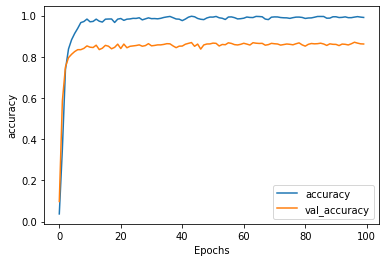

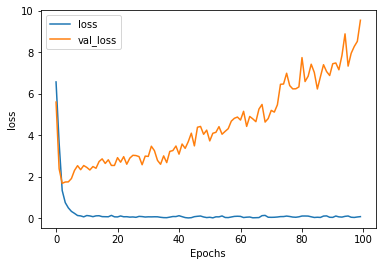

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")